In [23]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [24]:
# Read JSON file
with open('new_bus_json.json') as f:
    data = json.load(f)

# Extract relevant system data by Converting JSON data to DataFrame
system_data = []
for key, value in data['sensorData']['jsonData'].items():
    value['id'] = key  # Add an identifier for each data point
    system_data.append(value)

# Convert to pandas DataFrame
df = pd.DataFrame(system_data)
df

,count,humidity,pressure,temperature,id,oxygenSensor
0,0,45.48,99.09,23.68,-NlJJWAq0weZ-2Ma2s2I,NaN
1,0,45.99,99.09,23.78,-NlJJWpxBWvtf89oy_8j,NaN
2,0,46.34,99.09,23.74,-NlJJXU-HIxTWY9fY1yU,NaN
3,0,46.19,99.09,23.74,-NlJJY7N0Hqj-mAfZhuW,NaN
4,0,46.47,99.09,23.78,-NlJJYlN7-idCOC5_nNI,NaN
...,...,...,...,...,...,...
7043,5,40.85,99.60,23.71,-Nv0Q-pNPJzMrIadKZRk,20.74
7044,5,41.07,99.60,23.71,-Nv0Q0lnZwZPIqzpPIFF,20.73
7045,5,40.92,99.60,23.71,-Nv0Q1iIDUka3IzUUCQj,20.74
7046,5,41.16,99.60,23.71,-Nv0Q2etjcgE3ZR6QQ_q,20.73


             count     humidity     pressure  temperature  oxygenSensor
count  7048.000000  7048.000000  7048.000000  7048.000000   4084.000000
mean     17.159620    40.485480    98.336019    23.700681     20.819167
std      29.646112     5.780863     5.892388     1.862144      0.101321
min       0.000000     0.000000     0.000000     0.000000     20.620000
25%       2.000000    39.580000    98.280000    22.710000     20.760000
50%       4.000000    40.840000    98.490000    23.410000     20.790000
75%       9.000000    43.960000    99.060000    25.110000     20.840000
max      91.000000   134.570000    99.820000    26.860000     21.270000


/Users/prabhbrar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


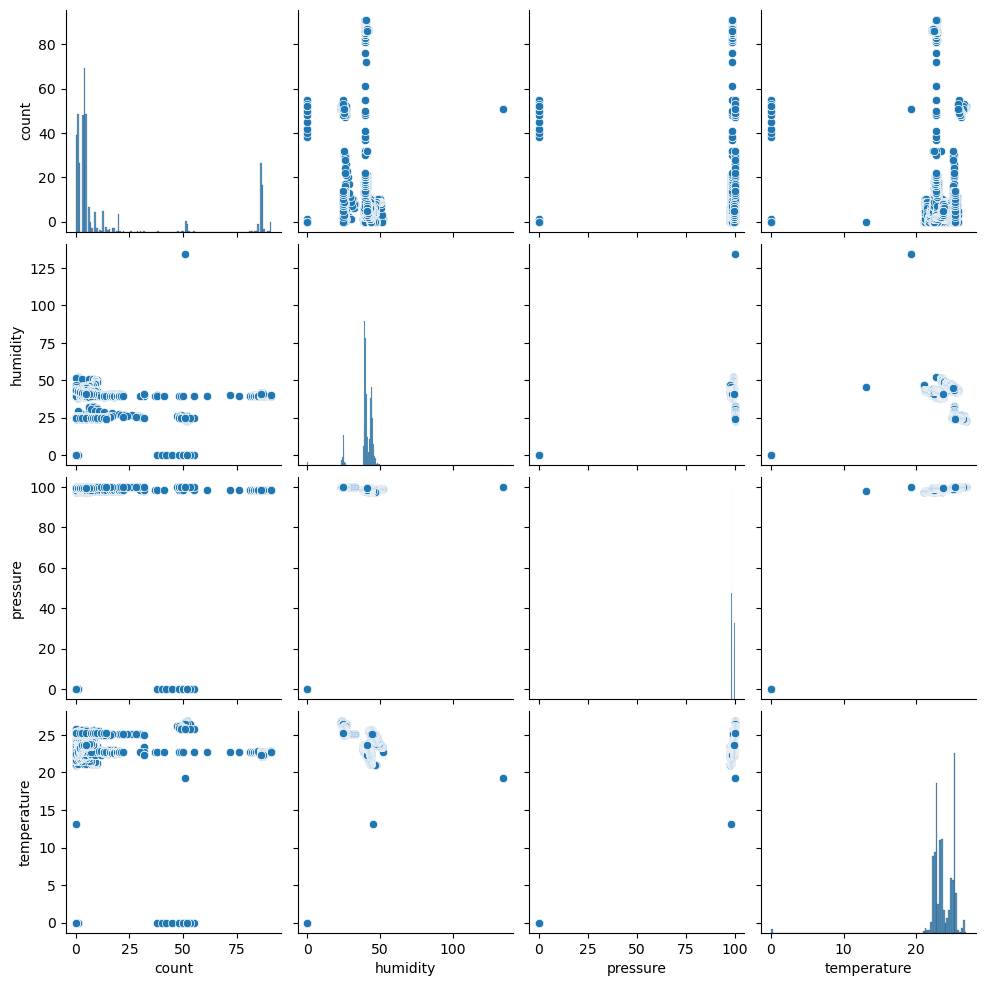

In [25]:
# Display basic statistics of the data
print(df.describe())

# Visualize distributions
sns.pairplot(df[['count', 'humidity', 'pressure', 'temperature']])
plt.show()


In [27]:
# Split data into features (X) and target variable (y)
X = df[['humidity', 'pressure', 'temperature']]
y = df['count']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
model = RandomForestClassifier()

# Train the classifier
model.fit(X_train, y_train)


RandomForestClassifier()

In [16]:
# Evaluate model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

score = model.score(X_test, y_test)
print("Model R^2 Score:", score)


Accuracy: 0.6464088397790055
Model R^2 Score: 0.6464088397790055


In [21]:
import json
import pandas as pd

# Read JSON data from the file
with open('new_bus_json.json', 'r') as file:
    json_data = json.load(file)

# Convert JSON data to DataFrame
data = []
for key, value in json_data['sensorData']['jsonData'].items():
    value['id'] = key
    data.append(value)
df = pd.DataFrame(data)

# Preprocess the data
X = df[['humidity', 'pressure', 'temperature']]

# Make predictions using the trained model
predictions = model.predict(X)

# Create a DataFrame with original data and predictions
predictions_df = pd.DataFrame({'Original Data': X.values.tolist(), 'Prediction': predictions})

# Print the DataFrame
print(predictions_df)

print("Last 50 Predictions:")
print(predictions[-50:])

              Original Data  Prediction
0     [45.48, 99.09, 23.68]           0
1     [45.99, 99.09, 23.78]           0
2     [46.34, 99.09, 23.74]           0
3     [46.19, 99.09, 23.74]           0
4     [46.47, 99.09, 23.78]           0
...                     ...         ...
7043   [40.85, 99.6, 23.71]           1
7044   [41.07, 99.6, 23.71]           0
7045   [40.92, 99.6, 23.71]           1
7046   [41.16, 99.6, 23.71]           0
7047   [40.93, 99.6, 23.69]           1

[7048 rows x 2 columns]
Last 50 Predictions:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 0 1]


In [22]:
# Read JSON file
with open('new_bus_json.json') as f:
    data = json.load(f)

# Extract relevant system data by Converting JSON data to DataFrame
system_data = []
for key, value in data['sensorData']['jsonData'].items():
    value['id'] = key  # Add an identifier for each data point
    system_data.append(value)

# Convert to pandas DataFrame
df = pd.DataFrame(system_data)
df

,count,humidity,pressure,temperature,id,oxygenSensor
0,0,45.48,99.09,23.68,-NlJJWAq0weZ-2Ma2s2I,NaN
1,0,45.99,99.09,23.78,-NlJJWpxBWvtf89oy_8j,NaN
2,0,46.34,99.09,23.74,-NlJJXU-HIxTWY9fY1yU,NaN
3,0,46.19,99.09,23.74,-NlJJY7N0Hqj-mAfZhuW,NaN
4,0,46.47,99.09,23.78,-NlJJYlN7-idCOC5_nNI,NaN
...,...,...,...,...,...,...
7043,5,40.85,99.60,23.71,-Nv0Q-pNPJzMrIadKZRk,20.74
7044,5,41.07,99.60,23.71,-Nv0Q0lnZwZPIqzpPIFF,20.73
7045,5,40.92,99.60,23.71,-Nv0Q1iIDUka3IzUUCQj,20.74
7046,5,41.16,99.60,23.71,-Nv0Q2etjcgE3ZR6QQ_q,20.73
